In [ ]:
import json,pandas as pd, numpy as np, os,csv,random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv,time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
csv_file = '/home/zxt/data/final/data.csv'
csv_data = pd.read_csv(csv_file, low_memory=False)
csv_df = pd.DataFrame(csv_data)

In [3]:
len(csv_df)

212266

In [4]:
csv_df.head()

,image_id,label
0,S7_F07_R1_IMAG0140.JPG,elephant
1,CA-44_09_11_2015_CA-44_0007006.jpg,wild_boar
2,S10_F10_R1_IMAG1959.JPG,gazellethomosons
3,CA-41_08_04_2015_CA-41_0006076.jpg,squirrel
4,1603150213300952S194.JPG,hedgehog


In [6]:
df = csv_df

In [8]:
df.groupby('label').count()

,image_id
label,
bird,10000
black_bear,10000
bobcat,10000
buffalo,15434
cattle,10000
elephant,18481
fox,10000
gazellethomosons,10000
giraffe,7040


In [12]:
df.label.unique()

array(['elephant', 'wild_boar', 'gazellethomosons', 'squirrel',
       'hedgehog', 'guineafowl', 'moose', 'bobcat', 'bird', 'fox',
       'giraffe', 'buffalo', 'hare', 'vehicle', 'wildebeest', 'cattle',
       'skunk', 'lion', 'zebra', 'black_bear'], dtype=object)

In [14]:
df_1 = df[df['label']=='elephant']
df_2 = df[df['label']=='wild_boar']
df_3 = df[df['label']=='gazellethomosons']
df_4 = df[df['label']=='squirrel']
df_5 = df[df['label']=='hedgehog']

df_6 = df[df['label']=='guineafowl']
df_7 = df[df['label']=='moose']
df_8 = df[df['label']=='bobcat']
df_9 = df[df['label']=='bird']
df_10 = df[df['label']=='fox']

df_11 = df[df['label']=='giraffe']
df_12 = df[df['label']=='buffalo']
df_13 = df[df['label']=='hare']
df_14 = df[df['label']=='vehicle']
df_15 = df[df['label']=='wildebeest']

df_16 = df[df['label']=='cattle']
df_17 = df[df['label']=='skunk']
df_18 = df[df['label']=='lion']
df_19 = df[df['label']=='zebra']
df_20 = df[df['label']=='black_bear']

In [16]:
df_1.head(2)

,image_id,label
0,S7_F07_R1_IMAG0140.JPG,elephant
19,S7_F06_R2_IMAG0093.JPG,elephant


In [18]:
df_2.head(2)

,image_id,label
1,CA-44_09_11_2015_CA-44_0007006.jpg,wild_boar
6,CA-17_09_18_2015_CA-17_0024895.jpg,wild_boar


In [19]:
df_3.head(2)

,image_id,label
2,S10_F10_R1_IMAG1959.JPG,gazellethomosons
111,S10_M09_R1_IMAG0410.JPG,gazellethomosons


In [20]:
df_4.head(2)

,image_id,label
3,CA-41_08_04_2015_CA-41_0006076.jpg,squirrel
28,2010_Unit180_Ivan036_img0142.jpg,squirrel


In [21]:
df_5.head(2)

,image_id,label
4,1603150213300952S194.JPG,hedgehog
32,111016222048031a1601.JPG,hedgehog


In [22]:
df_6.head(2)

,image_id,label
5,S6_N09_R2_IMAG0221.JPG,guineafowl
48,S9_J12_R2_IMAG0042.JPG,guineafowl


In [23]:
df_7.head(2)

,image_id,label
7,2015_Unit097_Ivan073_img0252.jpg,moose
55,2016_Unit160_Ivan070_img0324.jpg,moose


In [24]:
df_8.head(2)

,image_id,label
8,FL-35_07_06_2016_FL-35_0047784.JPG,bobcat
9,FL-08_01_21_2016_FL-08_0015297.jpg,bobcat


In [25]:
df_9.head(2)

,image_id,label
10,58ce3cf3-23d2-11e8-a6a3-ec086b02610b.jpg,bird
15,01111510160605197512.JPG,bird


In [26]:
df_10.head(2)

,image_id,label
12,CA-36_03_21_2016_CA-36_0003767.JPG,fox
34,2016_Unit006_SWTB017_img0492.jpg,fox


In [27]:
df_11.head(2)

,image_id,label
13,S9_E01_R2_IMAG0491.JPG,giraffe
122,S10_E03_R1_IMAG0137.JPG,giraffe


In [28]:
df_12.head(2)

,image_id,label
14,S7_G02_R2_IMAG0488.JPG,buffalo
33,S10_H02_R2_IMAG0701.JPG,buffalo


In [29]:
df_13.head(2)

,image_id,label
16,2016_Unit064_Ivan056_img0187.jpg,hare
17,2014_Unit160_Ivan045_img0017.jpg,hare


In [30]:
df_14.head(2)

,image_id,label
20,FL-27_06_02_2015_FL-27_0009379.jpg,vehicle
30,5a27da76-23d2-11e8-a6a3-ec086b02610b.jpg,vehicle


In [31]:
df_15.head(2)

,image_id,label
22,S10_N06_R2_IMAG0650.JPG,wildebeest
23,S10_C13_R1_IMAG3872.JPG,wildebeest


In [32]:
df_16.head(2)

,image_id,label
27,CA-30_08_03_2015_CA-30_0016285.jpg,cattle
29,FL-20_06_30_2015_FL-20_0010972.jpg,cattle


In [33]:
df_17.head(2)

,image_id,label
31,CA-24_01_21_2016_CA-24_0013737.jpg,skunk
37,59ac6c04-23d2-11e8-a6a3-ec086b02610b.jpg,skunk


In [34]:
df_18.head(2)

,image_id,label
38,CA-34_08_04_2015_CA-34_0016225.jpg,lion
59,2010_Unit166_Ivan071_img0063.jpg,lion


In [35]:
df_19.head(2)

,image_id,label
46,S10_O13_R3_IMAG0446.JPG,zebra
51,S10_H02_R1_IMAG0658.JPG,zebra


In [36]:
df_20.head(2)

,image_id,label
52,CA-17_08_03_2015_CA-17_0020752.jpg,black_bear
54,CA-17_07_01_2016_CA-17_0038646.JPG,black_bear


In [37]:
elephant = df[df['label']=='elephant']
wild_boar = df[df['label']=='wild_boar']
gazellethomosons = df[df['label']=='gazellethomosons']
squirrel = df[df['label']=='squirrel']
hedgehog= df[df['label']=='hedgehog']

guineafowl = df[df['label']=='guineafowl']
moose = df[df['label']=='moose']
bobcat = df[df['label']=='bobcat']
bird = df[df['label']=='bird']
fox = df[df['label']=='fox']

giraffe = df[df['label']=='giraffe']
buffalo = df[df['label']=='buffalo']
hare = df[df['label']=='hare']
vehicle = df[df['label']=='vehicle']
wildebeest = df[df['label']=='wildebeest']

cattle = df[df['label']=='cattle']
skunk = df[df['label']=='skunk']
lion = df[df['label']=='lion']
zebra = df[df['label']=='zebra']
black_bear = df[df['label']=='black_bear']

In [41]:
import random


In [46]:
type(cattle)

pandas.core.frame.DataFrame

In [43]:
random.seed(912)
cattle_2k = random.sample(cattle,2000)

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [50]:
elephant_2k = elephant.sample(n=2000,random_state=912,replace=False)
wild_boar_2k = wild_boar.sample(n=2000,random_state=912,replace=False)
gazellethomosons_2k = gazellethomosons.sample(n=2000,random_state=912,replace=False)
squirrel_2k = squirrel.sample(n=2000,random_state=912,replace=False)
hedgehog_2k = hedgehog.sample(n=2000,random_state=912,replace=False)

guineafowl_2k = guineafowl.sample(n=2000,random_state=912,replace=False)
moose_2k = moose.sample(n=2000,random_state=912,replace=False)
bobcat_2k = bobcat.sample(n=2000,random_state=912,replace=False)
bird_2k = bird.sample(n=2000,random_state=912,replace=False)
fox_2k = fox.sample(n=2000,random_state=912,replace=False)

giraffe_2k = giraffe.sample(n=2000,random_state=912,replace=False)
buffalo_2k = buffalo.sample(n=2000,random_state=912,replace=False)
hare_2k = hare.sample(n=2000,random_state=912,replace=False)
vehicle_2k = vehicle.sample(n=2000,random_state=912,replace=False)
wildebeest_2k = wildebeest.sample(n=2000,random_state=912,replace=False)

cattle_2k = cattle.sample(n=2000,random_state=912,replace=False)
skunk_2k = skunk.sample(n=2000,random_state=912,replace=False)
lion_2k = lion.sample(n=2000,random_state=912,replace=False)
zebra_2k = zebra.sample(n=2000,random_state=912,replace=False)
black_bear_2k = black_bear.sample(n=2000,random_state=912,replace=False)

In [51]:
len(cattle_2k)

2000

In [52]:
cattle_2k.head()

,image_id,label
31147,CA-10_08_13_2015_CA-10_0011818.jpg,cattle
53841,CA-43_06_21_2016_CA-43_0022339.JPG,cattle
211603,FL-15_04_05_2016_FL-15_0016388.JPG,cattle
78166,58ede46a-23d2-11e8-a6a3-ec086b02610b.jpg,cattle
147715,59373314-23d2-11e8-a6a3-ec086b02610b.jpg,cattle


In [53]:
df_all = pd.concat([elephant_2k,wild_boar_2k,gazellethomosons_2k,squirrel_2k,hedgehog_2k,guineafowl_2k,moose_2k,bobcat_2k,bird_2k,fox_2k,giraffe_2k,buffalo_2k,hare_2k,vehicle_2k,wildebeest_2k,cattle_2k,skunk_2k,lion_2k,zebra_2k,black_bear_2k ])

In [55]:
len(df_all)

40000

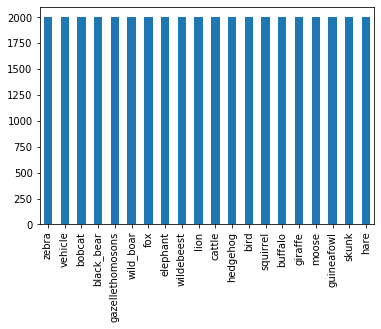

In [56]:
df_all['label'].value_counts().plot.bar()

In [57]:
train_df, validate0_df = train_test_split(df_all, test_size=0.30, random_state=522)
train_df = train_df.reset_index(drop=True)
validate0_df = validate0_df.reset_index(drop=True)

In [58]:
validate_df, test_df = train_test_split(validate0_df, test_size=0.30, random_state=626)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [60]:
len(train_df)

28000

### train set 

In [61]:
imglist = train_df['image_id'].tolist()
X_train = np.empty((len(imglist),32,32,3))
X_train.shape

(28000, 32, 32, 3)

In [62]:
Y_train = np.empty((len(imglist),1))
Y_train.shape

(28000, 1)

In [63]:
path = '/home/zxt/data/raw_data_all/'

In [64]:
count =0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(32,32))
        X_train[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [69]:
np.save('/home/zxt/code/final/2k_new/X_train',X_train)

In [70]:
len(nonelist)

0

In [71]:
nonelist

[]

In [72]:
label = train_df['label']
Y_train = [i for i in label]
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train.shape

(28000, 1)

In [73]:
np.save('Y_train',Y_train)

In [75]:
X_train[0]

array([[[137., 137., 137.],
        [164., 164., 164.],
        [180., 180., 180.],
        ...,
        [144., 144., 144.],
        [138., 138., 138.],
        [149., 149., 149.]],

       [[180., 180., 180.],
        [164., 164., 164.],
        [193., 193., 193.],
        ...,
        [140., 140., 140.],
        [172., 172., 172.],
        [100., 100., 100.]],

       [[180., 180., 180.],
        [193., 193., 193.],
        [177., 177., 177.],
        ...,
        [184., 184., 184.],
        [175., 175., 175.],
        [163., 163., 163.]],

       ...,

       [[214., 214., 212.],
        [230., 230., 228.],
        [219., 219., 219.],
        ...,
        [215., 215., 215.],
        [206., 206., 206.],
        [195., 195., 195.]],

       [[215.,  94.,  39.],
        [211.,  96.,  41.],
        [245., 245., 245.],
        ...,
        [207., 207., 207.],
        [207., 207., 207.],
        [186., 186., 186.]],

       [[237., 164., 145.],
        [218.,  95.,  25.],
        [  0.,  

In [76]:
Y_train

array([['hedgehog'],
       ['gazellethomosons'],
       ['hedgehog'],
       ...,
       ['gazellethomosons'],
       ['moose'],
       ['wild_boar']], dtype='<U16')

### validate dataset

In [77]:
validate_df.shape

(8400, 2)

In [78]:
imglist = validate_df['image_id'].tolist()
X_validate = np.empty((len(imglist),32,32,3))
X_validate.shape

(8400, 32, 32, 3)

In [ ]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(32,32))
        X_validate[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [ ]:
len(nonelist)

In [ ]:
nonelist

In [ ]:
label = validate_df['label']
Y_validate = [i for i in label]
Y_validate = np.array(Y_validate)
Y_validate = Y_validate.reshape(len(Y_validate),1)
Y_validate.shape

In [ ]:
np.save('X_validate',X_validate)
np.save('Y_validate',Y_validate)

### test dataset

In [ ]:
imglist = test_df['image_id'].tolist()
X_test = np.empty((len(imglist),32,32,3))
X_test.shape

In [ ]:
start=time()

count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(32,32))
        X_test[count]=img
        count+=1
    except:
        nonelist.append(img_path)
        
end=time()
print("Runing time: %s seconds"%(end-start))

In [ ]:
len(nonelist)

In [ ]:
nonelist

In [ ]:
label = test_df['label']
Y_test = [i for i in label]
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
Y_test.shape

In [ ]:
test_df[:2]

In [ ]:
Y_test[:2]

In [ ]:
np.save('X_test',X_test)
np.save('Y_test',Y_test)